<a href="https://colab.research.google.com/github/glaubermateus/Python_Scripts/blob/main/Modelagem_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introdução

In [ ]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Carregamento e Visualização dos dados
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Nome das colunas
colunas = ['numero_medio_quartos_por_residencia','idade_media_residencias','taxa_criminalidade','proporcao_lotes','proporcao_empresas','rio_no_bairro','taxa_poluicao','distancia_centro','index_acessibilidade','imposto_residencial','taxa_professores','consumo_medio_energia','taxa_desabrigados','taxa_ocupacao']
df.columns = colunas
print(df.columns)

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao'],
      dtype='object')


In [ ]:
# Copia dos dados (preservar o df original)
df2 = df.copy()

In [ ]:
# Informacoes Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  506 non-null    float64
 1   idade_media_residencias              506 non-null    float64
 2   taxa_criminalidade                   506 non-null    float64
 3   proporcao_lotes                      506 non-null    int64  
 4   proporcao_empresas                   506 non-null    float64
 5   rio_no_bairro                        506 non-null    float64
 6   taxa_poluicao                        506 non-null    float64
 7   distancia_centro                     506 non-null    float64
 8   index_acessibilidade                 506 non-null    int64  
 9   imposto_residencial                  506 non-null    float64
 10  taxa_professores                     506 non-null    float64
 11  consumo_medio_energia           

In [ ]:
# Outra
linhas = '-'*40
print('Tipos de variáveis\n')
print(df.dtypes,'\n')
print(linhas)
print('\nValores Missing por Variável\n')
print(df.isnull().sum())
print(linhas)
print('\nTotal de linhas duplicadas: ',df.duplicated().sum())
print(linhas)
print('\nTotal de linhas: ',df.shape[0])
print('\nTotal de colunas: ',df.shape[1])

Tipos de variáveis

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                          int64
proporcao_empresas                     float64
rio_no_bairro                          float64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                    float64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object 

----------------------------------------

Valores Missing por Variável

numero_medio_quartos_por_residencia    0
idade_media_residencias                0
taxa_criminalidade                     0
proporcao_lotes                        0
proporcao_empresas                     0
rio_no_bairro                

In [ ]:
# Resumo estatistico da variavel-alvo
df.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


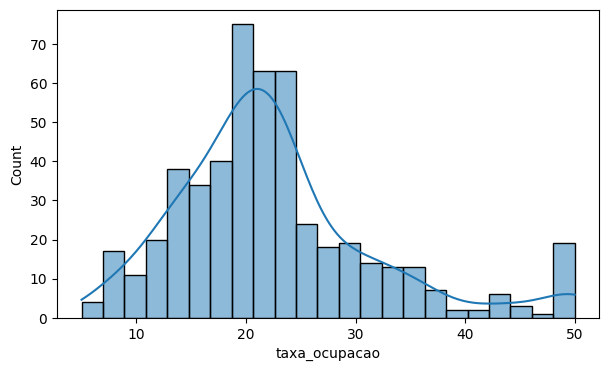

In [ ]:
# Histograma da variavel-alvo
plt.figure(figsize=(7,4))
sns.histplot(df.taxa_ocupacao, kde=True)
plt.show()

Nota-se que a distribuição da variável alvo é levemente assimétrica a direita (calda mais longa a direita do pico). Diante disso, iremos aplicar uma tranformação logaritmica para evitar distorção nos dados

In [ ]:
# Transformando a variavel
df['taxa_ocupacao_log'] = np.log(df['taxa_ocupacao'])

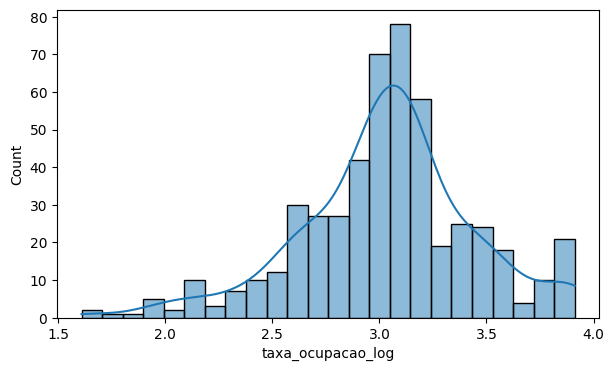

In [ ]:
# Verificando o grafico da nova variavel
plt.figure(figsize=(7,4))
sns.histplot(df.taxa_ocupacao_log, kde=True)
plt.show()

In [ ]:
# Visualizando os dados
df.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,3.589059


In [ ]:
# Separando as variáveis
alvo = colunas[-1]
atributos = colunas[:-2]
print("variavel alvo: ",alvo)
print("variaveis preditoras: ",atributos)

variavel alvo:  taxa_ocupacao
variaveis preditoras:  ['numero_medio_quartos_por_residencia', 'idade_media_residencias', 'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas', 'rio_no_bairro', 'taxa_poluicao', 'distancia_centro', 'index_acessibilidade', 'imposto_residencial', 'taxa_professores', 'consumo_medio_energia']


In [ ]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):

    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

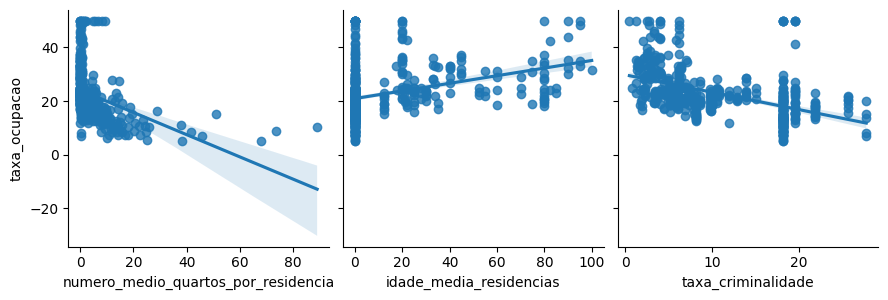

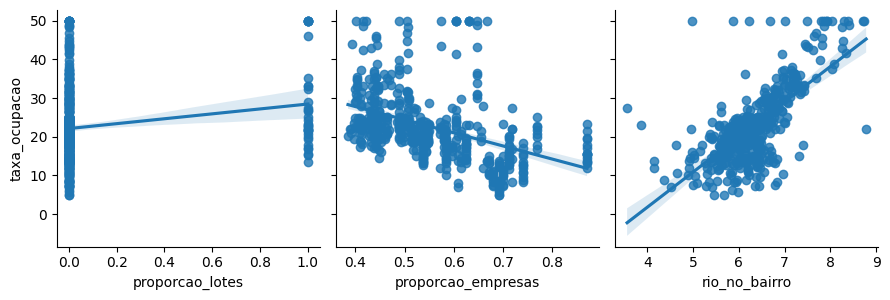

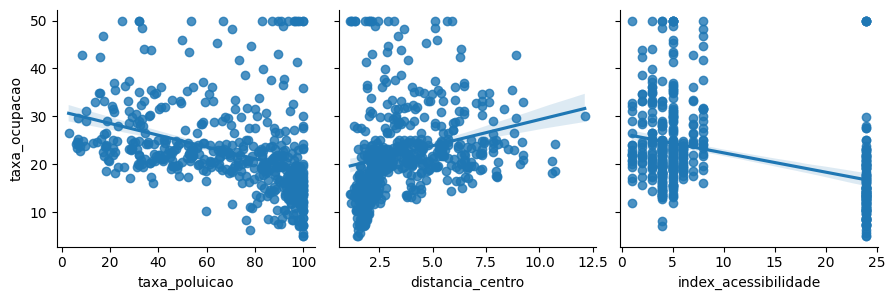

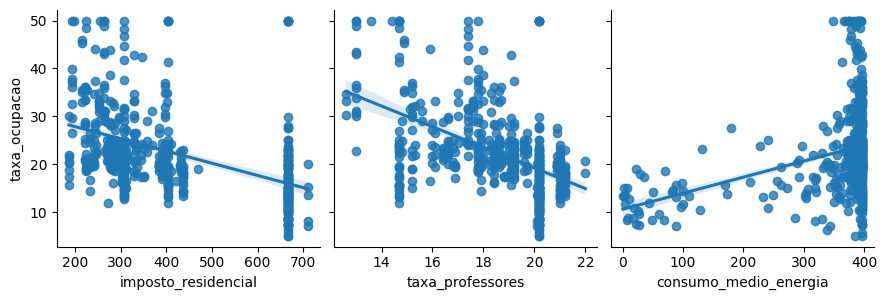

In [ ]:
# Visualizando graficamente outliers
get_pairs(df,alvo, atributos,3)

## Tratando Outliers

In [ ]:
# Criando o IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
linf = Q1 - 3.5 * IQR
lsup = Q3 + 3.5 * IQR
print(IQR)

numero_medio_quartos_por_residencia      3.595038
idade_media_residencias                 12.500000
taxa_criminalidade                      12.910000
proporcao_lotes                          0.000000
proporcao_empresas                       0.175000
rio_no_bairro                            0.738000
taxa_poluicao                           49.050000
distancia_centro                         3.088250
index_acessibilidade                    20.000000
imposto_residencial                    387.000000
taxa_professores                         2.800000
consumo_medio_energia                   20.847500
taxa_desabrigados                       10.005000
taxa_ocupacao                            7.975000
taxa_ocupacao_log                        0.384196
dtype: float64


**Nota:** A fórmula original dos limites superrior e inferior tem como constante o valor 1,5 que multiplica o intervalo interquartil. Todavia, foi escolhido o valor de 3,5 para que se preservasse uma quantidade maior dos dados, uma vez que quanto maior essa constante menos rigoroso é o corte nos dados.

In [ ]:
# Define os outliers com base no IQR
outliers = ( (df < (linf)) |(df > (lsup)) ).sum()
outliers.sort_values(ascending=False)

,0
consumo_medio_energia,54
idade_media_residencias,39
proporcao_lotes,35
numero_medio_quartos_por_residencia,24
taxa_criminalidade,0
rio_no_bairro,0
proporcao_empresas,0
taxa_poluicao,0
distancia_centro,0
imposto_residencial,0


In [ ]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(df)) * 100})
outliers_summary[outliers_summary.Outliers > 0]

,Outliers,Percentual
numero_medio_quartos_por_residencia,24,4.743083
idade_media_residencias,39,7.707510
proporcao_lotes,35,6.916996
consumo_medio_energia,54,10.671937


In [ ]:
# Remoção dos Outliers
filtro = ~( (df < (linf)) | (df > (lsup)) ).any(axis=1)
novo_df = df[filtro]

In [ ]:
# Shape do Novo Dataframe
novo_df.shape

(365, 15)

In [ ]:
# Registros removidos
print("Total de registros originais: ",df.shape[0])
print("Total de registros restantes: ",novo_df.shape[0])
print("Total de Registros removidos: ",(df.shape[0] - novo_df.shape[0]))
print("% Linhas Removidas: ", round(((df.shape[0] - novo_df.shape[0]) / df.shape[0]) * 100, 2))

Total de registros originais:  506
Total de registros restantes:  365
Total de Registros removidos:  141
% Linhas Removidas:  27.87


In [ ]:
# Visualizando o novo df
novo_df

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,3.589059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,3.109061
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,3.025291
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,3.173878
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,3.091042


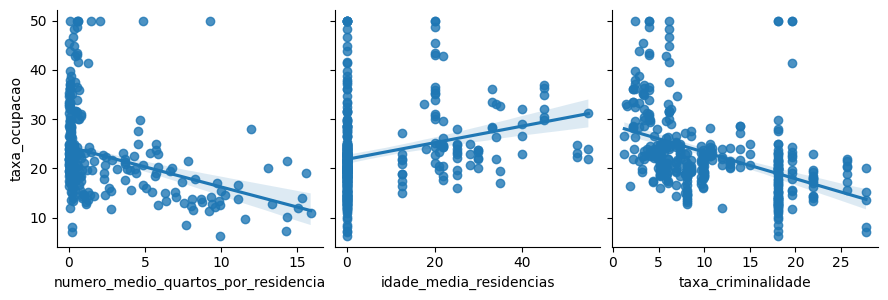

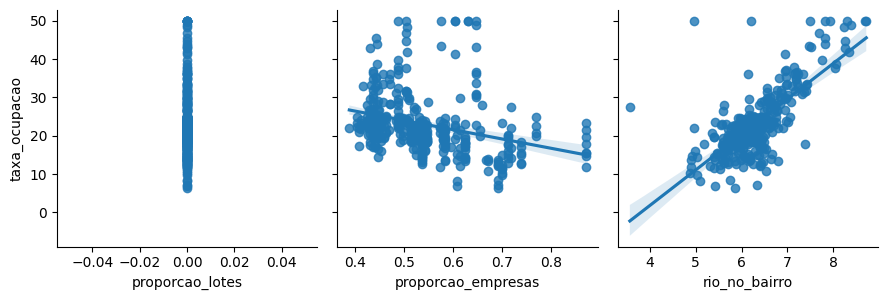

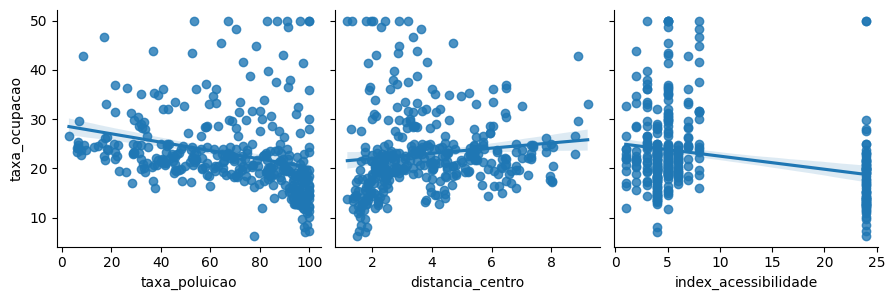

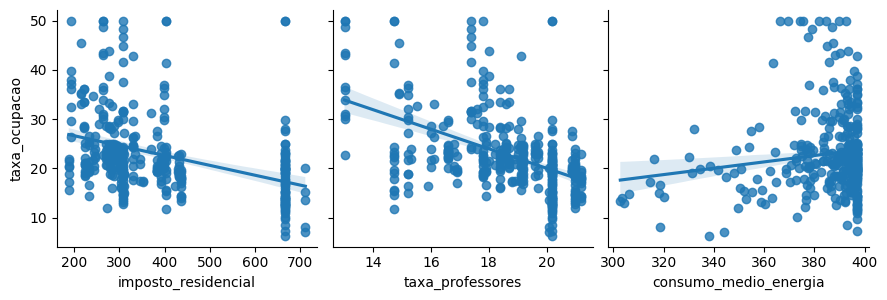

In [ ]:
# Visualizando graficamente outliers
get_pairs(novo_df,alvo, atributos,3)

## Análise de Multicolinearidade

In [ ]:
df_cor = novo_df.corr() # Cria a matriz de correlação
df_cor

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.248461,0.520532,NaN,0.589824,-0.191637,0.409897,-0.446009,0.862231,0.780255,0.317680,-0.254080,0.467831,-0.331420,-0.431441
idade_media_residencias,-0.248461,1.000000,-0.440805,NaN,-0.413997,0.265197,-0.411098,0.535318,-0.210615,-0.269261,-0.407793,0.140008,-0.331021,0.267812,0.297781
taxa_criminalidade,0.520532,-0.440805,1.000000,NaN,0.687005,-0.382249,0.526612,-0.611312,0.510749,0.687205,0.376293,-0.297396,0.573345,-0.440217,-0.499641
proporcao_lotes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proporcao_empresas,0.589824,-0.413997,0.687005,NaN,1.000000,-0.245191,0.685493,-0.750162,0.562279,0.632725,0.122222,-0.286240,0.535658,-0.303238,-0.390052
rio_no_bairro,-0.191637,0.265197,-0.382249,NaN,-0.245191,1.000000,-0.143533,0.121884,-0.153795,-0.264615,-0.348641,0.172958,-0.604029,0.737251,0.687440
taxa_poluicao,0.409897,-0.411098,0.526612,NaN,0.685493,-0.143533,1.000000,-0.681180,0.343217,0.425082,0.189741,-0.220650,0.547614,-0.283018,-0.376049
distancia_centro,-0.446009,0.535318,-0.611312,NaN,-0.750162,0.121884,-0.681180,1.000000,-0.385679,-0.476040,-0.147331,0.208998,-0.409555,0.119433,0.211121
index_acessibilidade,0.862231,-0.210615,0.510749,NaN,0.562279,-0.153795,0.343217,-0.385679,1.000000,0.875057,0.363546,-0.268628,0.358462,-0.252126,-0.321312
imposto_residencial,0.780255,-0.269261,0.687205,NaN,0.632725,-0.264615,0.425082,-0.476040,0.875057,1.000000,0.398978,-0.313661,0.463442,-0.384130,-0.462696


A multicolinearidade ocorre quando duas ou mais variáveis preditoras apresentam alta correlação, podendo gerar problemas nos coeficientes e impactar nas previsões. A matriz de correlação possibilitar ver a correlação entre as variáves no dataframe e identificar possíveis casos de multicolinearidade.

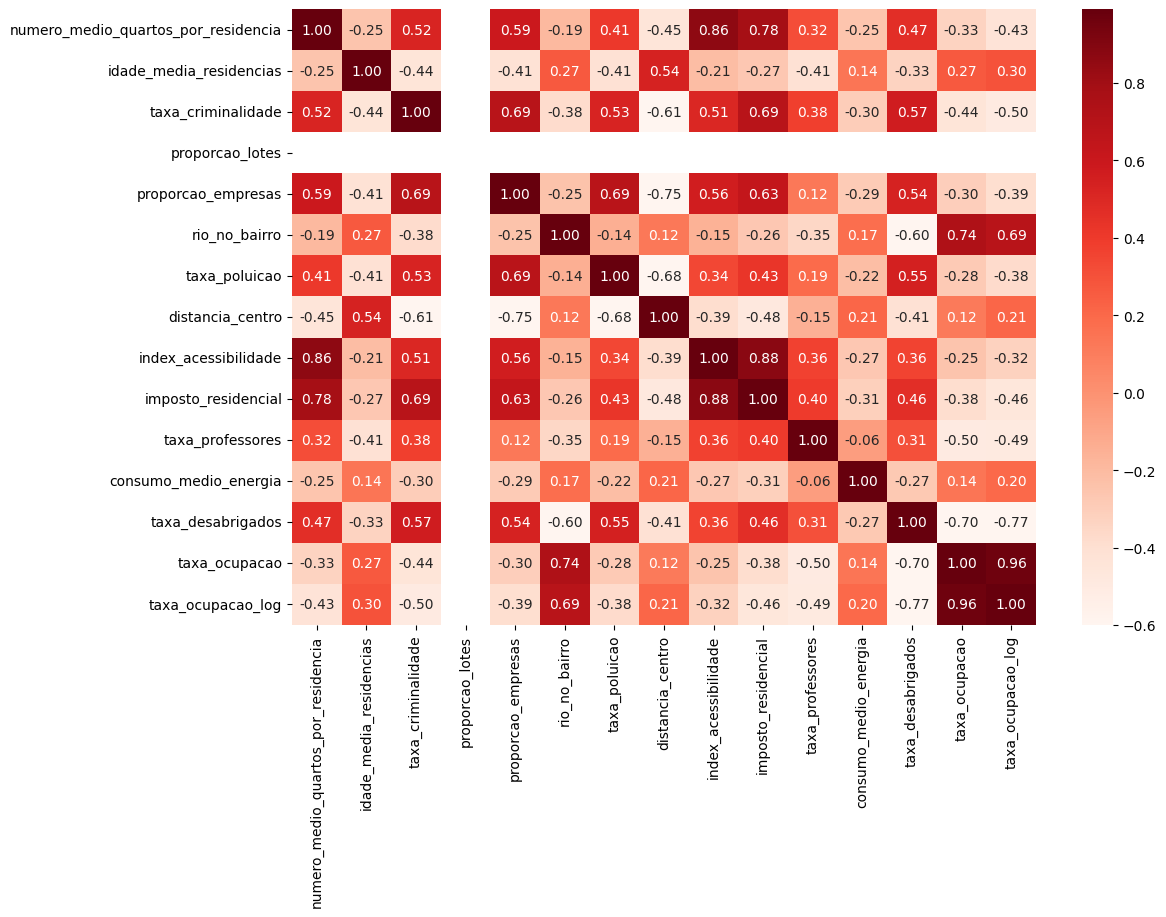

In [ ]:
# Visualizando a matriz de correlação com heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True,fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

In [ ]:
# A variável proporção de lotes ficou zerada e, por isso, será removida do dataset
novo_df = novo_df.drop(columns={'proporcao_lotes'})

Por enquanto, não iremos adotar estratégias para contornar a multicolinearidade. Seguiremos com todas as variáveis e, após gerar e avaliar a primeira versão do modelo, adotaremos estratégias para remover a multicolinearidade.

## Preparação dos Dados

In [ ]:
# Variavel alvo e Variaveis Preditoras
Y = novo_df['taxa_ocupacao_log']
X = novo_df.drop(columns={'taxa_ocupacao','taxa_ocupacao_log'})

In [ ]:
# Divisao dos dados
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
# Dimensao dos dados de treino e teste
print("Dimensao dos dados de treino: ",X_treino.shape)
print("Dimensao dos dados de teste: ",X_teste.shape)

Dimensao dos dados de treino:  (292, 12)
Dimensao dos dados de teste:  (73, 12)


## Modelo - Versão 1

In [ ]:
X_treino_const = sm.add_constant(X_treino)
print("Dimensão do treino: ",X_treino_const.shape)
print(type(X_treino_const))

Dimensão do treino:  (292, 13)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
modelo_v1 = sm.OLS(Y_treino, X_treino_const).fit()

In [ ]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.54e-93
Time:                        12:52:22   Log-Likelihood:                 144.78
No. Observations:                 292   AIC:                            -263.6
Df Residuals:                     279   BIC:                            -215.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.0548      0.304     10.057      0.000       2.457       3.653
numero_medio_quartos_por_residencia    -0.0300      0.006     -5.325      0.000      -0.041      -0.019
idade_media_residencias                -0.0006      0.001     -0.634      0.527      -0.002       0.001
taxa_criminalidade                      0.0027      0.002      1.177      0.240      -0.002       0.007
proporcao_empresas                     -0.2257      0.173     -1.307      0.192      -0.566       0.114
rio_no_bairro                           0.1846      0.019      9.836      0.000       0.148       0.222
taxa_poluicao                          -0.0012      0.001     -2.134      0.034      -0.002   -9.09e-05
distancia_centro                       -0.0314      0.008     -3.707      0.000      -0.048      -0.015
index_acessibilidade                    0.0175      0.003      5.437      0.000       0.011       0.024
imposto_residencial                    -0.0006      0.000     -4.153      0.000      -0.001      -0.000
taxa_professores                       -0.0410      0.006     -7.184      0.000      -0.052      -0.030
consumo_medio_energia                   0.0007      0.001      1.389      0.166      -0.000       0.002
taxa_desabrigados                      -0.0198      0.002     -7.980      0.000      -0.025      -0.015
==============================================================================
Omnibus:                       34.429   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.404
Skew:                           0.129   Prob(JB):                     5.01e-44
Kurtosis:                       7.040   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Coeficientes aprendidos pelo modelo
modelo_v1.params

,0
const,3.054830
numero_medio_quartos_por_residencia,-0.029987
idade_media_residencias,-0.000586
taxa_criminalidade,0.002675
proporcao_empresas,-0.225740
rio_no_bairro,0.184565
taxa_poluicao,-0.001172
distancia_centro,-0.031436
index_acessibilidade,0.017508
imposto_residencial,-0.000595


O modelo apresenta um ótimo coeficiente de ajuste (R-squared) de 0.81, todavia, a nota 2 indica multicolinearidade e, por isso, fere um dos pressupostos da regressão linear de que os variáveis preditoras precisam ser independentes entre si.

### Verificando a multicolinearidade com VIF

In [ ]:
# Função para checar o VIF de todas as variáveis
def verifica_vif(train):

    # Cria o dataframe
    vif = pd.DataFrame()

    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]

    return vif

In [ ]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                                feature         VIF
0   numero_medio_quartos_por_residencia    5.924127
1               idade_media_residencias    2.225565
2                    taxa_criminalidade   10.443239
3                    proporcao_empresas   91.628308
4                         rio_no_bairro  130.621567
5                         taxa_poluicao   20.226577
6                      distancia_centro   15.357966
7                  index_acessibilidade   16.916294
8                   imposto_residencial   44.342889
9                      taxa_professores  122.230026
10                consumo_medio_energia  274.366182
11                    taxa_desabrigados   13.361545


Interpreta-se o VIF da seguinte maneira: Quanto maior o VIF das variáveis maiores são as correlações. É possível perceber que as variáveis apresentaram elevado índice do indicador. Portanto, iremos ajustar a escala dos dados e mensurar novamente.

### Padronizando os dados

In [ ]:
padronizador = StandardScaler()

In [ ]:
X_treino_escalado = padronizador.fit_transform(X_treino)
X_teste_escalado = padronizador.transform(X_teste)

In [ ]:
print(X_treino_escalado.shape)
print(X_teste_escalado.shape)
print(type(X_treino_escalado))
print(type(X_teste_escalado))

(292, 12)
(73, 12)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Modelo - Versão 2

In [ ]:
# Adicionando a constante
X_treino_const = sm.add_constant(X_treino_escalado)

In [ ]:
# Modelo v1
modelo_v2 = sm.OLS(Y_treino, X_treino_const).fit()

In [ ]:
# R2
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     100.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           1.54e-93
Time:                        12:52:22   Log-Likelihood:                 144.78
No. Observations:                 292   AIC:                            -263.6
Df Residuals:                     279   BIC:                            -215.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0751      0.009    348.520      0.000       3.058       3.092
x1            -0.1012      0.019     -5.325      0.000      -0.139      -0.064
x2            -0.0074      0.012     -0.634      0.527      -0.030       0.016
x3             0.0179      0.015      1.177      0.240      -0.012       0.048
x4            -0.0236      0.018     -1.307      0.192      -0.059       0.012
x5             0.1220      0.012      9.836      0.000       0.098       0.146
x6            -0.0321      0.015     -2.134      0.034      -0.062      -0.002
x7            -0.0586      0.016     -3.707      0.000      -0.090      -0.027
x8             0.1364      0.025      5.437      0.000       0.087       0.186
x9            -0.0944      0.023     -4.153      0.000      -0.139      -0.050
x10           -0.0841      0.012     -7.184      0.000      -0.107      -0.061
x11            0.0132      0.009      1.389      0.166      -0.005       0.032
x12           -0.1249      0.016     -7.980      0.000      -0.156      -0.094
==============================================================================
Omnibus:                       34.429   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.404
Skew:                           0.129   Prob(JB):                     5.01e-44
Kurtosis:                       7.040   Cond. No.                         8.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perceba que o coeficiente de ajuste do modelo não foi impactado, continuou com 0.81 e a nota 2 que antes informava sobre a existência de multicolinearidade desapareceu, indicando que o problema foi solucionado. Verificaremos novamente o VIF.

In [ ]:
# Cria um dataframe com os dados de X_treino_escalado (após mudar a escala foi alterado para o tipo ndarray)
df_X_treino = pd.DataFrame(X_treino_escalado, columns=X_treino.columns)

In [ ]:
# Resumo
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  4.643686
1               idade_media_residencias  1.746696
2                    taxa_criminalidade  2.980179
3                    proporcao_empresas  4.186215
4                         rio_no_bairro  1.974990
5                         taxa_poluicao  2.911782
6                      distancia_centro  3.212084
7                  index_acessibilidade  8.085017
8                   imposto_residencial  6.634607
9                      taxa_professores  1.761732
10                consumo_medio_energia  1.151952
11                    taxa_desabrigados  3.145311


Iremos remover as variáveis index_acessibilidade e imposto_residencial que possuem VIF > 5. Removeremos as variáveis dos dados de treino e teste.

In [ ]:
# Criando um dataframe dos dados de teste
df_X_teste = pd.DataFrame(X_teste_escalado, columns=X_teste.columns)
print(X_teste.columns)

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_empresas', 'rio_no_bairro',
       'taxa_poluicao', 'distancia_centro', 'index_acessibilidade',
       'imposto_residencial', 'taxa_professores', 'consumo_medio_energia',
       'taxa_desabrigados'],
      dtype='object')


In [ ]:
# Removendo as variáveis
del df_X_treino['index_acessibilidade']
del df_X_treino['imposto_residencial']
del df_X_teste['index_acessibilidade']
del df_X_teste['imposto_residencial']

In [ ]:
# Verificando o shape
print(X_treino.shape)
print(X_teste.shape)
print(df_X_treino.columns)

(292, 12)
(73, 12)
Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_empresas', 'rio_no_bairro',
       'taxa_poluicao', 'distancia_centro', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados'],
      dtype='object')


In [ ]:
# Convertendo novamente para o tipo ndarray
X_treino_escalado = df_X_treino.values
X_teste_escalado = df_X_teste.values
print(type(X_treino_escalado))
print(type(X_teste_escalado))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Modelo - Versão 3

In [ ]:
# Adicionando a constante
X_treino_const = sm.add_constant(X_treino_escalado)

In [ ]:
# modelo - v3
modelo_v3 = sm.OLS(Y_treino, X_treino_const).fit()

In [ ]:
# Resumo
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           2.23e-89
Time:                        12:52:22   Log-Likelihood:                 129.73
No. Observations:                 292   AIC:                            -237.5
Df Residuals:                     281   BIC:                            -197.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0751      0.009    332.197      0.000       3.057       3.093
x1            -0.0487      0.013     -3.709      0.000      -0.075      -0.023
x2            -0.0077      0.012     -0.632      0.528      -0.032       0.016
x3            -0.0038      0.015     -0.263      0.793      -0.033       0.025
x4            -0.0089      0.018     -0.490      0.625      -0.045       0.027
x5             0.1295      0.013     10.015      0.000       0.104       0.155
x6            -0.0392      0.016     -2.495      0.013      -0.070      -0.008
x7            -0.0518      0.017     -3.134      0.002      -0.084      -0.019
x8            -0.0753      0.012     -6.444      0.000      -0.098      -0.052
x9             0.0105      0.010      1.063      0.289      -0.009       0.030
x10           -0.1306      0.016     -8.011      0.000      -0.163      -0.098
==============================================================================
Omnibus:                       39.831   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.353
Skew:                          -0.049   Prob(JB):                     6.01e-66
Kurtosis:                       7.968   Cond. No.                         5.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Iremos remover as variáveis x2 (idade_media_residencias), x3 (taxa_criminalidade), x4 (proporcao_empresas) e x8 (imposto_residencial), uma vez que o valor-p do teste t foi acima de 0.05, indicando que as variáveis não são estatisticamente significantes para o modelo. Em outras palavras, analisa-se a hipótese nula de que não há relação entre as variáveis preditoras e a variável-alvo no modelo. Caso o valor-p seja inferior a 0.05, pode-se rejeitar a hipótese nula; caso seja superior a 0.05 não se rejeita a hipótese nula

In [ ]:
# Removendo as variáveis selecionadas do dataset
X_treino_clean = np.delete(X_treino_escalado, [1,2,3,8], axis=1)
X_teste_clean = np.delete(X_teste_escalado, [1,2,3,8], axis=1)

In [ ]:
# Verificando novamente o shape dos dados
print(X_treino_clean.shape)
print(X_teste_clean.shape)

(292, 6)
(73, 6)


## Modelo - Versão 4

In [ ]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean)

In [ ]:
# Cria o modelo
modelo_v4 = sm.OLS(Y_treino, X_treino_const).fit()

In [ ]:
# Sumário
modelo_v4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     177.9
Date:                Sun, 13 Jul 2025   Prob (F-statistic):           2.75e-93
Time:                        12:52:22   Log-Likelihood:                 128.61
No. Observations:                 292   AIC:                            -243.2
Df Residuals:                     285   BIC:                            -217.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0751      0.009    333.275      0.000       3.057       3.093
x1            -0.0545      0.012     -4.610      0.000      -0.078      -0.031
x2             0.1304      0.013     10.387      0.000       0.106       0.155
x3            -0.0424      0.015     -2.840      0.005      -0.072      -0.013
x4            -0.0504      0.013     -3.801      0.000      -0.076      -0.024
x5            -0.0717      0.010     -6.941      0.000      -0.092      -0.051
x6            -0.1329      0.016     -8.283      0.000      -0.164      -0.101
==============================================================================
Omnibus:                       39.167   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.881
Skew:                          -0.074   Prob(JB):                     1.38e-62
Kurtosis:                       7.837   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Importante enfatizar que após a remoção das variáveis, o valor do R-quadrado reduziu em 0.021 unidades (de: 0.81 para 0.789) indicando que as variáveis não eram significativas para o modelo.

In [ ]:
# Verificando os coeficientes
coef = modelo_v4.params.reset_index()
coef.columns = ['Variavel', 'Coeficiente']
coef.iloc[1:,0] = ['numero_medio_quartos_por_residencia','rio_no_bairro','taxa_poluicao','distancia_centro','taxa_professores','taxa_desabrigados']
coef

,Variavel,Coeficiente
0,const,3.075105
1,numero_medio_quartos_por_residencia,-0.054464
2,rio_no_bairro,0.130397
3,taxa_poluicao,-0.042391
4,distancia_centro,-0.050360
5,taxa_professores,-0.071744
6,taxa_desabrigados,-0.132872


A seguir se tem a interpretação dos coeficientes das variáveis preditoras que permaneceram no modelo.


*   numero_medio_quartos_por_residencia: Um aumento de uma unidade da variável implica numa redução de 5.44% na taxa de ocupação
*   rio_no_bairro:
*   taxa_poluicao:
*   distancia_centro:
*   taxa_professores:
*   taxa_desabrigados:

Nota: como a relação do modelo é log-nível, a interpretação é de que um aumento de n unidades na variável Xi ocasiona um aumento (ou diminuição) % de Bi na variável Y.

